# Plotting resisuls

Plot the residuals obtained with the results.

In [2]:
using Pkg
Pkg.activate("./")
using Glob
using Dates
using DIVAnd
using NCDatasets
using GeoDatasets
using CairoMakie, GeoMakie
using JupyterFormatter
enable_autoformat()
include("./config.jl")
monthlist = [Dates.monthname(mm) for mm = 1:12];

  Activating project at `~/Projects/EMODnet/EMODnet-Chemistry-GriddedMaps/src`


In [3]:
varname = "Water_body_dissolved_oxygen_concentration"
varname = "Water_body_phosphate"
cmap = cgrad(:RdYlBu, rev = true)
cmaperror = cgrad(:RdYlGn_10, 10, rev = true, categorical = true)

In [5]:
databasedir = "/home/ctroupin/data/EMODnet-Chemistry/Eutrophication2024/Results/"
datadir = joinpath(databasedir, "../netCDF")
casename = "$(varname)-res-0.25-epsilon2-2.0-varlen1-lb5-maxit-5000-reltol-1.0e-9-bathcl-go-exclude-mL-1960-exNS2-monthly"
residualsfile = joinpath(databasedir, casename, "Results/$(varname)_monthly_residuals.nc")
isfile(residualsfile), isdir(datadir)

(true, true)

## Read residuals

In [13]:
obsval, obslon, obslat, obsdepth, obstime, obsid =
    DIVAnd.loadobs(Float64, residualsfile, varname);

sel = findall(obsval .>= 10.0)

825-element Vector{Int64}:
  356720
  356722
  356727
  356731
  356732
  356733
  356734
  358158
  358161
  358162
  358163
  359177
  359974
       ⋮
 1194741
 1196053
 1196256
 1265501
 1265502
 1265503
 1265504
 1265505
 1271680
 1282252
 1282253
 1282254

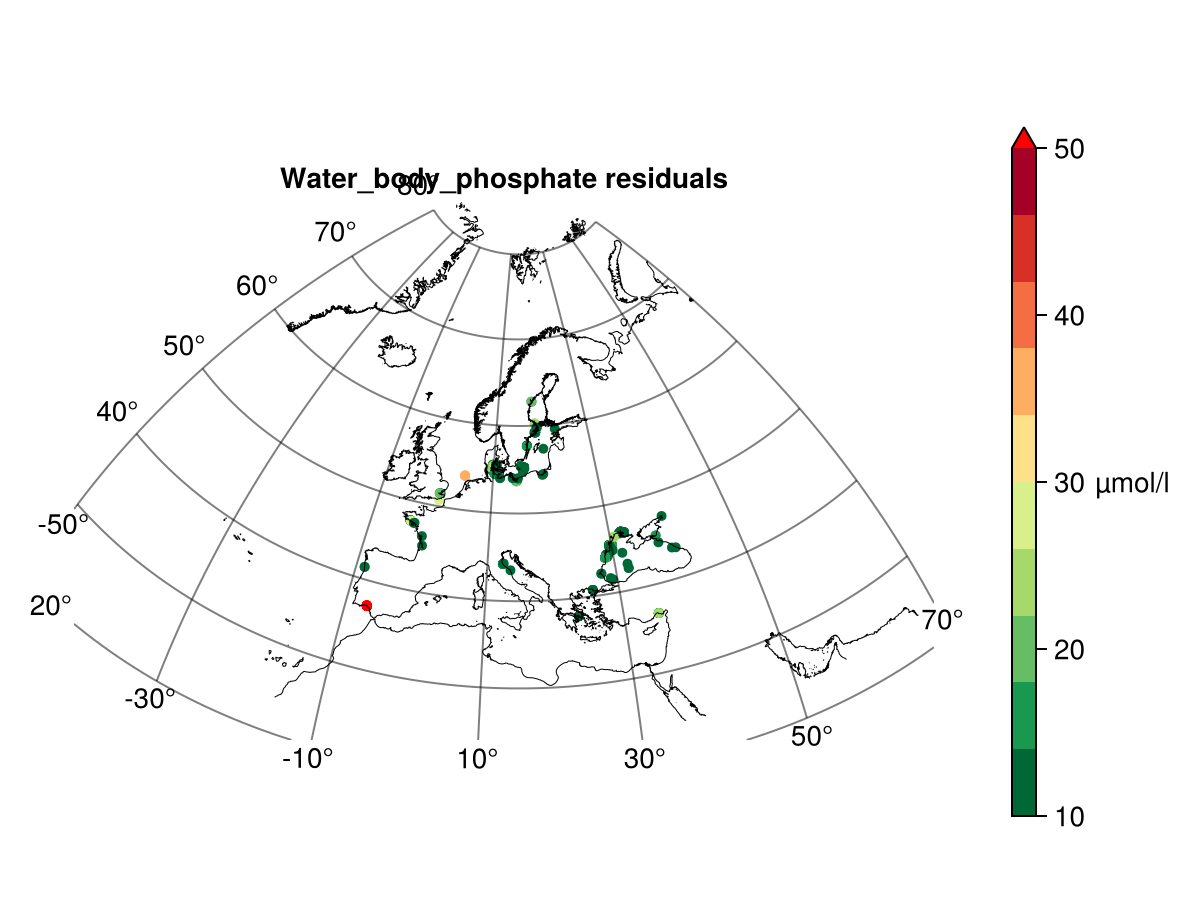

CairoMakie.Screen{IMAGE}


In [33]:
fig = Figure()
#ax1 = Axis(fig[1, 1])
#hist!(ax1, obsval[obsval.>5.0])

ax2 = GeoAxis(
    fig[1, 1],
    title = "$(varname) residuals",
    dest = "+proj=laea +lon_0=15 +lat_0=45",
    xticks = (-50:20.0:70),
    yticks = (20:10.0:85),
)

sc = scatter!(
    ax2,
    obslon[sel],
    obslat[sel],
    color = obsval[sel],
    colormap = cmaperror,
    markersize = 7,
    colorrange = (10, 50.0),
    highclip = :red,
)

add_coast!(ax2, coordscoast)

xlims!(ax2, lonr[1], lonr[end])
ylims!(ax2, latr[1], latr[end])
Colorbar(fig[1, 2], sc, label = varunits[varname], labelrotation = 0)
display(fig)